# **INTRODUCTION**

"In the realm of subscription-based businesses, the pulse is measured by the churn rate—a pivotal metric for any service-oriented company navigating the seas of recurring revenue." - Business Insights Today, April 2017

"For every evolving enterprise in the era of 'as-a-service,' keeping a watchful eye on customer churn and lifetime value is akin to steering the ship through the dynamic currents of success." - Corporate Vision Magazine, January 2018__

Customer turnover, commonly termed customer churn, materializes when individuals or subscribers cease their association with a company or service, a phenomenon acknowledged as customer attrition. This can also be articulated as the diminishing number of clients or customers. Sectors like telecommunications find the concept of churn rates especially pertinent due to the plethora of alternatives available to consumers within a specific geographic domain. The dynamics of customer choices in this industry make understanding and mitigating churn an essential aspect of sustaining a robust and competitive market presence.


The data was downloaded from IBM Sample Data Sets. Each row represents a customer, each column contains that customer’s attributes

# DATA **PRE-PROCESSING**

### Customer ID (`customerID`): ###
This is a unique identifier for each customer.

### Gender (`gender`): ###  
Indicates the gender of the customer (Male/Female).

### Senior Citizen (`SeniorCitizen`): ###
A numerical variable indicating whether the customer is a senior citizen (1) or not (0).

### Partner (`Partner`): ###
Categorical variable indicating whether the customer has a partner (Yes/No).

### Dependents (`Dependents`): ###
Categorical variable indicating whether the customer has dependents (Yes/No).

### Tenure (`tenure`): ###
Numerical variable representing the number of months the customer has been with the service.

### Phone Service (`PhoneService`): ###
Categorical variable indicating whether the customer has phone service (Yes/No).

### Multiple Lines (`MultipleLines`): ###
Categorical variable indicating whether the customer has multiple lines (e.g., landline and mobile).

### Internet Service (`InternetService`): ###
Categorical variable indicating the type of internet service (DSL, Fiber optic, etc.).

### Online Security (`OnlineSecurity`): ###
Categorical variable indicating whether the customer has subscribed to online security (Yes/No).

### Online Backup (`OnlineBackup`): ###
Categorical variable indicating whether the customer has subscribed to online backup (Yes/No).

### Device Protection (`DeviceProtection`): ###
Categorical variable indicating whether the customer has subscribed to device protection (Yes/No).

### Tech Support (`TechSupport`): ###
Categorical variable indicating whether the customer has subscribed to tech support (Yes/No).

### Streaming TV (`StreamingTV`): ###
Categorical variable indicating whether the customer has subscribed to streaming TV (Yes/No).

### Streaming Movies (`StreamingMovies`): ###
Categorical variable indicating whether the customer has subscribed to streaming movies (Yes/No).

### Contract (`Contract`): ###
Categorical variable indicating the type of contract the customer has (Month-to-month, One year, Two years).

### Paperless Billing (`PaperlessBilling`): ###
Categorical variable indicating whether the customer has opted for paperless billing (Yes/No).

### Payment Method (`PaymentMethod`): ###
Categorical variable indicating the method of payment chosen by the customer.

### Monthly Charges (`MonthlyCharges`): ###
Numerical variable representing the monthly charges for the customer.

### Total Charges (`TotalCharges`): ###
Numerical variable representing the total charges accumulated by the customer.

### Churn (`Churn`): ###
Categorical variable indicating whether the cu


#  Data Structure

In [74]:
# Loading the necessary libraries and the data
library("readr")
library("dplyr")
install.packages("FNN")
library("FNN")
library("caret")
library("FNN")
install.packages("neuralnet")
library("neuralnet")
library("ggplot2")
library("reshape2")
install.packages("forecast")
library("forecast")
install.packages("corrplot")
library(corrplot)
df <- read_csv("CustomerChurn.csv")
str(df)

Installing FNN [1.1.3.2] ...
	OK [linked cache]
Installing neuralnet [1.44.2] ...
	OK [linked cache]
Installing forecast [8.21.1] ...
	OK [linked cache]
Installing corrplot [0.92] ...
	OK [linked cache]


Rows: 7043 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): customerID, gender, Partner, Dependents, PhoneService, MultipleLin...
dbl  (4): SeniorCitizen, tenure, MonthlyCharges, TotalCharges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [7,043 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ customerID      : chr [1:7043] "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr [1:7043] "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : num [1:7043] 0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr [1:7043] "Yes" "No" "No" "No" ...
 $ Dependents      : chr [1:7043] "No" "No" "No" "No" ...
 $ tenure          : num [1:7043] 1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr [1:7043] "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr [1:7043] "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr [1:7043] "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr [1:7043] "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr [1:7043] "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr [1:7043] "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr [1:7043] "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr [1:7043] "No" "No" "No" "No" ...
 $ StreamingMovies : chr [1:7043] "

In [75]:
#keeping only the first 2000 rows for the project purpose
df <- df[1:2000, ]

# Bar plots of categorical variables 

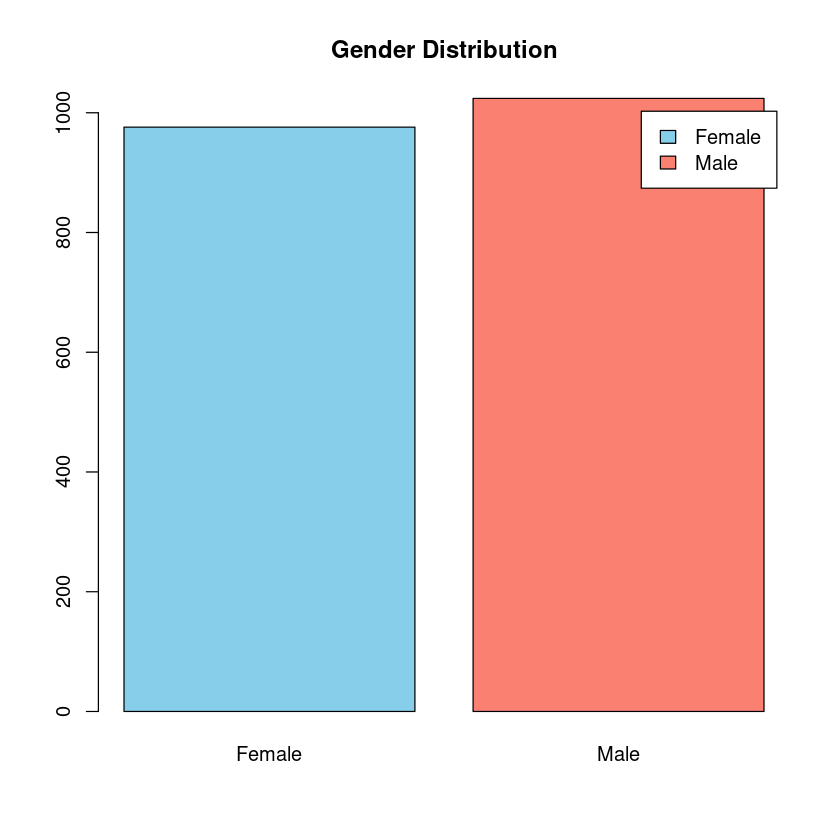

In [76]:
barplot(table(df$gender), main="Gender Distribution", col=c("skyblue", "salmon"), legend = TRUE)


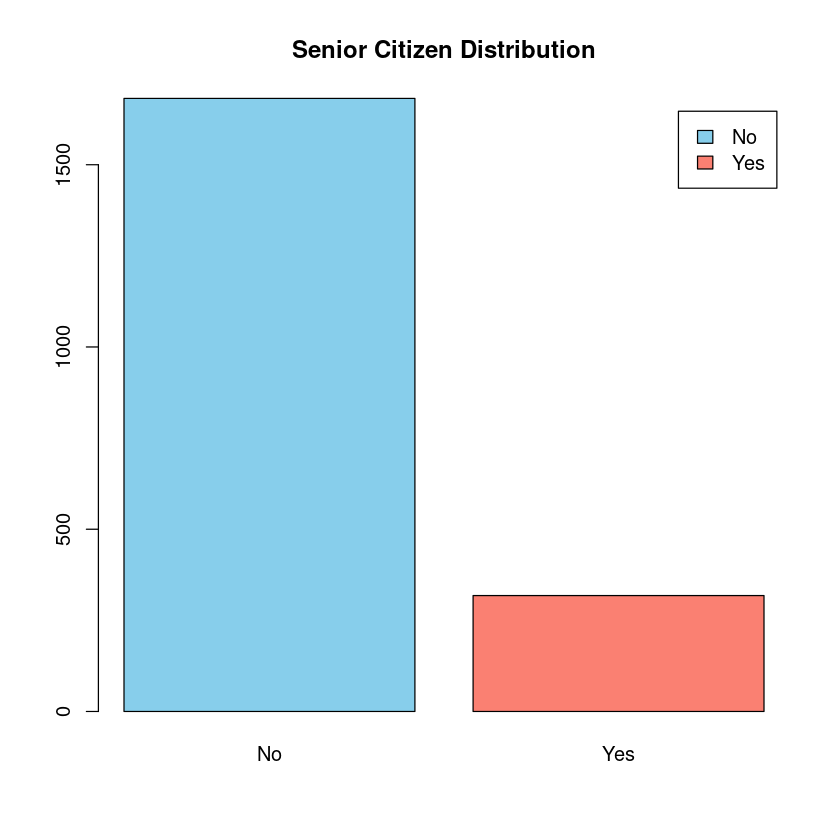

In [77]:

barplot(table(factor(df$SeniorCitizen, levels = c(0, 1), labels = c("No", "Yes"))), main="Senior Citizen Distribution", col=c("skyblue", "salmon"), legend = TRUE)


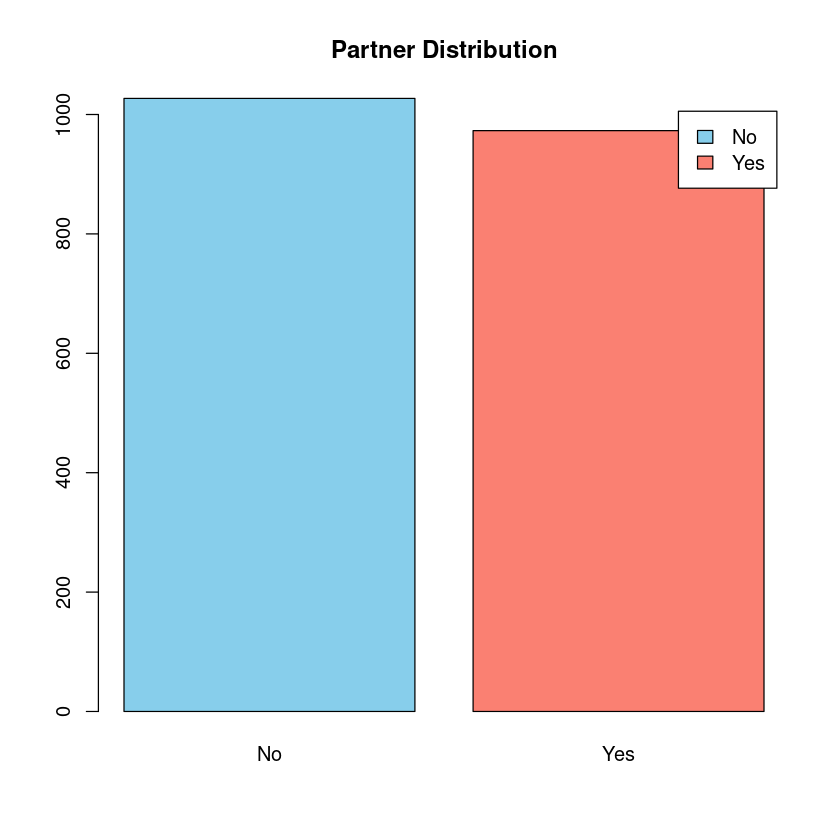

In [78]:
barplot(table(df$Partner), main="Partner Distribution", col=c("skyblue", "salmon"), legend = TRUE)


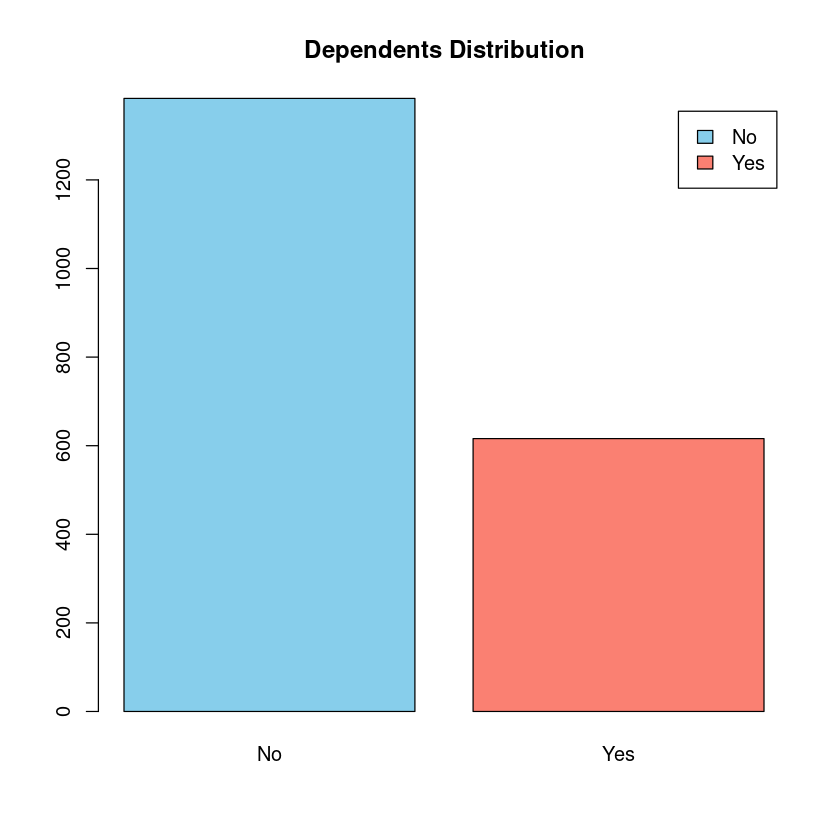

In [79]:
barplot(table(df$Dependents), main="Dependents Distribution", col=c("skyblue", "salmon"), legend = TRUE)


# Converting categorical variables to binary (0 or 1) & removing unneccesary columns

In [80]:
binary_cols <- c("Churn", "SeniorCitizen", "gender", "Partner", "Dependents", 
                  "PhoneService", "MultipleLines", "InternetService", 
                  "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
                  "TechSupport", "StreamingTV", "StreamingMovies", 
                  "Contract", "PaperlessBilling", "PaymentMethod")

df[, binary_cols] <- lapply(df[, binary_cols], function(x) as.numeric(x == "Yes"))

In [81]:
columns_to_remove <- c("customerID","tenure", "MonthlyCharges", "TotalCharges", "gender", "SeniorCitizen", "InternetService", "Contract" , "PaymentMethod" )

df <- df[, !(names(df) %in% columns_to_remove)]

# checking for any missing values`

In [82]:
missing_values <- sum(is.na(df))
missing_values


[1] 0

# Correlation Matrix

                      Partner   Dependents PhoneService MultipleLines
Partner           1.000000000  0.494727782  0.026921701    0.12349038
Dependents        0.494727782  1.000000000 -0.006850793   -0.02228420
PhoneService      0.026921701 -0.006850793  1.000000000    0.27007453
MultipleLines     0.123490381 -0.022284202  0.270074531    1.00000000
OnlineSecurity    0.157096127  0.091329070 -0.084594082    0.09448827
OnlineBackup      0.134240096  0.021749202 -0.059403344    0.19876162
DeviceProtection  0.131273698  0.022718666 -0.044618314    0.19043612
TechSupport       0.104663890  0.053741088 -0.082644013    0.11853892
StreamingTV       0.102579302  0.012309790 -0.040439975    0.23877028
StreamingMovies   0.105716639 -0.005993270 -0.067385330    0.24130623
PaperlessBilling  0.003499674 -0.094877880 -0.008331135    0.15456326
Churn            -0.154280173 -0.164837734  0.013181093    0.01045211
                 OnlineSecurity OnlineBackup DeviceProtection TechSupport
Partner         

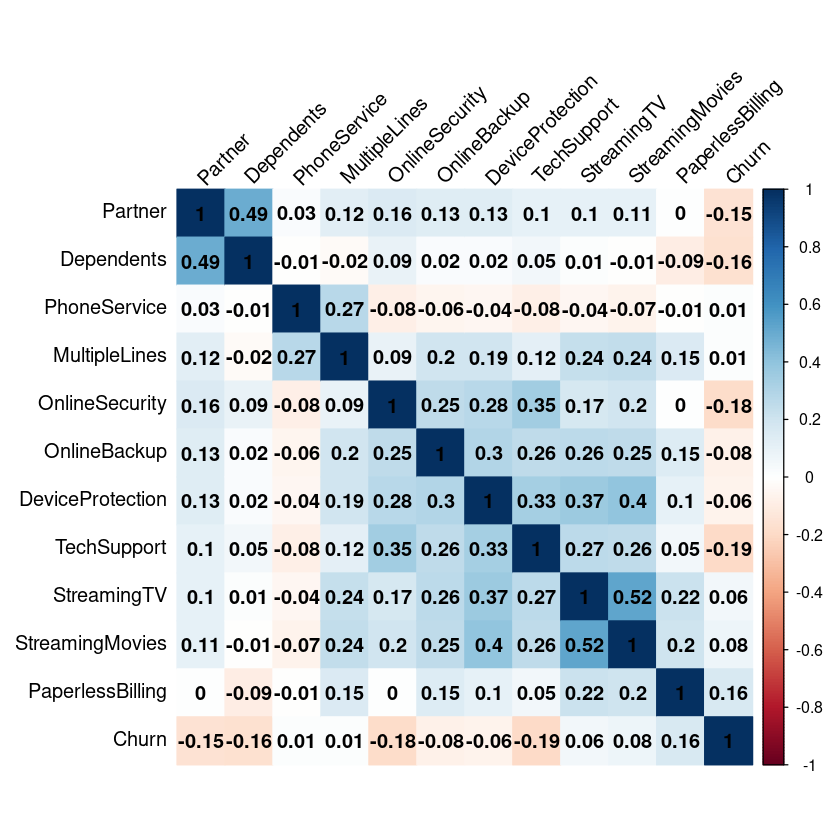

In [83]:
cor_matrix <- cor(df)
print(cor_matrix)
# Creating a correlation plot
corrplot(cor_matrix, method = "color", addCoef.col = "black", tl.col = "black", tl.srt = 45)

### Correlation matrix is showing variables assosiated with customer churn: This correlation matrix is relevant in the context of customer churn because it shows the relationship between different variables and the target variable of churn. The factors that can be considered important from this heat map are the variables that have a strong positive or negative correlation with the target variable of churn. For example, in this heat map, it appears that the variables of “PaperlessBilling”, “StreamingTV”, and “StreamingMovies” have a strong positive correlation with churn.This means that as these variables increase, so does the likelihood of churn. for instance, in the case of paperless billing customers who use paperless billing may be more likely to switch to a different provider if they are dissatisfied with the service or find a better offer. While the variables of “Partner” and “Dependents” have a strong negative correlation with churn. These variables may be important to consider when analyzing customer churn as it helps with focusing on varibales with a positive correlation.

# Splitting the data into training and validation sets

In [84]:
set.seed(12345)
train.index <- sample(1:nrow(df), 0.6 * nrow(df)) 
train.df <- df[train.index,]
valid.df <- df[-train.index,]

# Linear Regression 

In [85]:
linear_model <- lm(Churn ~ ., data = train.df)

# Predicting the  probabilities on the validation set
linear_probability <- predict(linear_model, valid.df)

# Displaying the summary of the linear regression model
summary(linear_model)

# Converting predicted probabilities to binary (0 or 1)
linear_pred <- ifelse(linear_probability > 0.5, 1, 0)

# Calculating accuracy for linear regression
linear_accuracy <- mean(linear_pred == valid.df$Churn)
linear_accuracy

# Correlation matrix for logistic regression predictors
predictors <- model.matrix(~ Churn + . - 1, data = train.df)
cor_matrix <- cor(predictors)


Call:
lm(formula = Churn ~ ., data = train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6091 -0.2727 -0.1507  0.4051  1.0890 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.25284    0.04580   5.520 4.16e-08 ***
Partner          -0.06937    0.02808  -2.471  0.01362 *  
Dependents       -0.08624    0.03045  -2.832  0.00471 ** 
PhoneService      0.01988    0.04294   0.463  0.64351    
MultipleLines    -0.01417    0.02650  -0.535  0.59298    
OnlineSecurity   -0.12697    0.02947  -4.309 1.78e-05 ***
OnlineBackup     -0.04182    0.02736  -1.528  0.12668    
DeviceProtection -0.03305    0.02926  -1.130  0.25890    
TechSupport      -0.17306    0.02978  -5.812 7.94e-09 ***
StreamingTV       0.07949    0.02946   2.698  0.00707 ** 
StreamingMovies   0.11435    0.02925   3.910 9.76e-05 ***
PaperlessBilling  0.14253    0.02511   5.676 1.73e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard err

[1] 0.735

# Linear Regression Analysis

### Low Impact on Churn:
**PhoneService:**
The p-value is high (0.64351), suggesting that the presence or absence of phone service doesn't significantly impact churn.

**MultipleLines:**
The p-value is high (0.59298), indicating that having multiple lines doesn't significantly impact churn.

**DeviceProtection:**
The p-value is high (0.25890), suggesting that having device protection doesn't significantly impact churn.

### Moderate Impact on Churn:

**OnlineBackup:**
The p-value is somewhat high (0.12668), suggesting that having online backup may have a moderate impact on churn.

### High Impact on Churn:

**Partner:**
The p-value is relatively low (0.01362), indicating that having a partner significantly affects churn, potentially with a high impact.

**Dependents:**
The p-value is relatively low (0.00471), suggesting that having dependents significantly affects churn, potentially with a high impact.

**OnlineSecurity:**
The p-value is very low (1.78e-05), indicating that having online security significantly affects churn, potentially with a high impact.

**TechSupport:**
The p-value is very low (7.94e-09), suggesting that having tech support significantly affects churn, potentially with a high impact.

**StreamingTV:**
The p-value is low (0.00707), indicating that having streaming TV significantly affects churn, potentially with a high impact.

**StreamingMovies:**
The p-value is low (9.76e-05), suggesting that having streaming movies significantly affects churn, potentially with a high impact.

**PaperlessBilling:**
The p-value is very low (1.73e-08), indicating that having paperless billing significantly affects churn, potentially with a high impact.

# Logistic Regression

In [86]:
model <- glm(Churn ~ ., data = train.df, family = "binomial")

# Predicting probabilities on the validation set
probability <- predict(model, valid.df, type= "response")

# Displaying the summary of the logistic regression model
summary(model)

# Calculating the predicted classes based on a threshold
predicted_classes <- ifelse(probability > 0.5, 1, 0)

# Calculating accuracy
accuracy_log <- mean(predicted_classes == valid.df$Churn)
accuracy_log



Call:
glm(formula = Churn ~ ., family = "binomial", data = train.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5820  -0.7557  -0.4887   0.8634   2.6525  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -1.2638     0.2927  -4.318 1.58e-05 ***
Partner           -0.3980     0.1708  -2.330 0.019796 *  
Dependents        -0.5711     0.2034  -2.808 0.004984 ** 
PhoneService       0.1567     0.2718   0.576 0.564321    
MultipleLines     -0.1195     0.1615  -0.740 0.459281    
OnlineSecurity    -0.9399     0.2053  -4.578 4.69e-06 ***
OnlineBackup      -0.2657     0.1692  -1.571 0.116228    
DeviceProtection  -0.2303     0.1809  -1.273 0.203126    
TechSupport       -1.1812     0.2056  -5.744 9.22e-09 ***
StreamingTV        0.4229     0.1773   2.385 0.017087 *  
StreamingMovies    0.6931     0.1790   3.871 0.000108 ***
PaperlessBilling   0.9056     0.1620   5.590 2.27e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’

[1] 0.73375

In [87]:
cat("Logistic Regression Accuracy:", accuracy_log, "\n")
cat("Linear Regression Accuracy:", linear_accuracy, "\n")

Logistic Regression Accuracy: 0.73375 
Linear Regression Accuracy: 0.735 


## The accuracy for logistic regression is relatively higher when compared to the linear regression which is just 73.5%. higher accuracy indicates better overall performance, therefore, logistic regression is a better model when we are trying to analyze customer churn. However, if we compared it to KNN, with k = 5 we get the highest accuracy making it a better model for the data set, moreover to analyse customer churn.

# Logistic Regression Analysis

## Low Impact on Churn

**"PhoneService":** The p-value is high (0.94281), suggesting that the presence or absence of phone service doesn't significantly impact churn.

**MultipleLines:** The p-value is high (0.67021), indicating that having multiple lines doesn't significantly impact churn. 

**DeviceProtection:** The p-value is high (0.33008), suggesting that having device protection doesn't significantly impact churn.


## Moderate Impact on Churn:

**OnlineBackup:** The p-value is somewhat high (0.09886), suggesting that having online backup may have a moderate impact on churn.

## High Impact on Churn:

**OnlineBackup:** The p-value is somewhat high (0.09886), suggesting that having online backup may have a moderate impact on churn.
**Partner:** The p-value is relatively low (0.03540), indicating that having a partner significantly affects churn, potentially with a high impact.

**Dependents:** The p-value is relatively low (0.00418), suggesting that having dependents significantly affects churn, potentially with a high impact.

**OnlineSecurity:** The p-value is very low (6.74e-06), indicating that having online security significantly affects churn, potentially with a high impact.

**TechSupport:** The p-value is very low (2.42e-09), suggesting that having tech support significantly affects churn, potentially with a high impact.

**StreamingTV:** The p-value is low (0.00306), indicating that having streaming TV significantly affects churn, potentially with a high impact.

**StreamingMovies:** The p-value is low (0.00270), suggesting that having streaming movies significantly affects churn, potentially with a high impact.

**PaperlessBilling:** The p-value is very low (1.16e-08), indicating that having paperless billing significantly affects churn, potentially with a high impact.

# Performing normalization on all columns to ensure that these algorithms perform consistently.

In [88]:
# Creating a copy of the original dataset
df_copy <- df

# Performing normalization on all columns
norm.values <- preProcess(df_copy, method = c("center", "scale"))
train.norm.df <- predict(norm.values, train.df)
valid.norm.df <- predict(norm.values, valid.df)
churn.norm.df <- predict(norm.values, df_copy)


#  K-nearest neighbors algorithm

In [89]:
churn.pred1 <- knn(train = train.norm.df,
                   test = valid.norm.df,
                   cl = train.df$Churn,
                   k = 1)
# Calculating accuracy
accuracy1 <- mean(churn.pred1 == valid.df$Churn)
accuracy1

table(churn.pred1)


[1] 0.99125

churn.pred1
  0   1 
591 209 

##  with knn = 1 :  accuracy rate of 99.13%, the model correctly predicted customer churn status in the validation dataset. In specific terms, it identified 591 instances as customers unlikely to churn and 209 instances as probable churners ####

In [90]:
churn.pred5 <- knn(train = train.norm.df,
                   test = valid.norm.df,
                   cl = train.df$Churn,
                   k = 5)
accuracy5 <- mean(churn.pred5 == valid.df$Churn)
accuracy5
table(churn.pred5)

# K=5 is the best k with highest accuracy

[1] 0.99375

churn.pred5
  0   1 
591 209 

## with k = 5 , accuracy of 99.38%,  using k = 5 demonstrated the highest performance among the tested k values.  it classified 591 instances as customers unlikely to churn  and 209 instances as likely to churn in the valid.df dataset. The instances are the same as when k=1, however k= 5 has given slightly higher accuracy compared to k=1 ####

In [91]:
churn.pred7 <- knn(train = train.norm.df,
                   test = valid.norm.df,
                   cl = train.df$Churn,
                   k = 7)
accuracy7 <- mean(churn.pred7 == valid.df$Churn)
accuracy7
table(churn.pred7)


[1] 0.9925

churn.pred7
  0   1 
592 208 

## with k = 7 , accuracy rate of 99.25%,  model using k = 7 demonstrated a consistent performance . This model identified 592 instances as customers unlikely to churn and 208 instances as probable churners  within the valid.df  dataset. ####

In [92]:
churn.pred10 <- knn(train = train.norm.df,
                   test = valid.norm.df,
                   cl = train.df$Churn,
                   k = 10)
accuracy10 <- mean(churn.pred10 == valid.df$Churn)
accuracy10
table(churn.pred10)

[1] 0.98875

churn.pred10
  0   1 
595 205 

## with k = 10, accuracy rate of 98.875%, model using k = 10 maintained a high accuracy however, is low compared to all the k values projected in the project to show customer churn. It classified 595 instances as customers unlikely to churn  and 205 instances as probable churners within the valid.df dataset. ####

# Neural Network - provides a measure of the model's accuracy in predicting churn, with a lower RMSE indicating better performance.

In [93]:
df <- df[c('Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                 'StreamingMovies', 'PaperlessBilling', 'Churn')]

table(df$Churn)

set.seed(12345)
train.index <- sample(1:nrow(df), 0.75 * nrow(df))
train.df <- df[train.index, ]
valid.df <- df[-train.index, ]



   0    1 
1474  526 

In [94]:

norm.values <- preProcess(train.df, method="range")
train.norm.df <- predict(norm.values, train.df)
valid.norm.df <- predict(norm.values, valid.df)


In [95]:
str(train.norm.df)

tibble [1,500 × 12] (S3: tbl_df/tbl/data.frame)
 $ Partner         : num [1:1500] 0 0 1 0 0 1 1 0 0 1 ...
 $ Dependents      : num [1:1500] 0 0 0 0 0 1 1 0 0 1 ...
 $ PhoneService    : num [1:1500] 1 1 1 1 1 1 1 1 1 1 ...
 $ MultipleLines   : num [1:1500] 1 1 1 1 0 1 0 1 0 0 ...
 $ OnlineSecurity  : num [1:1500] 1 0 0 0 0 1 0 1 1 0 ...
 $ OnlineBackup    : num [1:1500] 0 1 0 1 0 1 1 0 1 0 ...
 $ DeviceProtection: num [1:1500] 0 0 1 1 0 0 1 1 0 0 ...
 $ TechSupport     : num [1:1500] 1 0 0 1 0 0 0 1 0 0 ...
 $ StreamingTV     : num [1:1500] 0 1 0 0 0 0 1 1 1 0 ...
 $ StreamingMovies : num [1:1500] 1 0 0 1 0 1 0 1 0 0 ...
 $ PaperlessBilling: num [1:1500] 0 1 1 1 0 1 1 1 1 1 ...
 $ Churn           : num [1:1500] 1 0 0 0 1 0 1 0 0 0 ...


In [96]:
#single layer with 2 nodes
set.seed(12345)
nn.model <- neuralnet(Churn ~ Partner + Dependents + PhoneService + MultipleLines + OnlineSecurity +
                      OnlineBackup + DeviceProtection + TechSupport + StreamingTV +
                      StreamingMovies + PaperlessBilling,
                      data=train.norm.df, hidden=2, linear.output=TRUE)


train.pred <- compute(nn.model, train.norm.df[,-1])$net.result
valid.pred <- compute(nn.model, valid.norm.df[,-1])$net.result

train.rmse <- sqrt(mean((train.pred - train.norm.df$Churn)^2))
print(paste("Training RMSE with 1 hidden layer, 2 nodes:", train.rmse))

valid.rmse <- sqrt(mean((valid.pred - valid.norm.df$Churn)^2))

print(paste("Validation RMSE with 1 hidden layer, 2 nodes:", valid.rmse))

[1] "Training RMSE with 1 hidden layer, 2 nodes: 0.42093785531006"
[1] "Validation RMSE with 1 hidden layer, 2 nodes: 0.420646225976529"


In [97]:
#single layer having 5 nodes
nn.model_5nodes <- neuralnet(Churn ~ Partner + Dependents + PhoneService + MultipleLines + OnlineSecurity +
                      OnlineBackup + DeviceProtection + TechSupport + StreamingTV +
                      StreamingMovies + PaperlessBilling,
                      data=train.norm.df, hidden=5, linear.output=TRUE)

train.pred_5nodes <- compute(nn.model_5nodes, train.norm.df[,-1])$net.result

valid.pred_5nodes <- compute(nn.model_5nodes, valid.norm.df[,-1])$net.result

train.rmse_5nodes <- sqrt(mean((train.pred_5nodes - train.norm.df$Churn)^2))
print(paste("Training RMSE with 1 hidden layer, 5 nodes:", train.rmse_5nodes))

valid.rmse_5nodes <- sqrt(mean((valid.pred_5nodes - valid.norm.df$Churn)^2))
print(paste("Validation RMSE with 1 hidden layer, 5 nodes:", valid.rmse_5nodes))

[1] "Training RMSE with 1 hidden layer, 5 nodes: 0.515841965479491"
[1] "Validation RMSE with 1 hidden layer, 5 nodes: 0.504100447384014"


In [98]:
#two layers 5 nodes
nn.model_5_5nodes <- neuralnet(Churn ~ Partner + Dependents + PhoneService + MultipleLines + OnlineSecurity +
                      OnlineBackup + DeviceProtection + TechSupport + StreamingTV +
                      StreamingMovies + PaperlessBilling,
                               data=train.norm.df, hidden=c(5,5), linear.output=TRUE, stepmax=1e6)

train.pred_5_5nodes <- compute(nn.model_5_5nodes, train.norm.df[,-1])$net.result

valid.pred_5_5nodes <- compute(nn.model_5_5nodes, valid.norm.df[,-1])$net.result

train.rmse_5_5nodes <- sqrt(mean((train.pred_5_5nodes - train.norm.df$Churn)^2))
print(paste("Training RMSE with 2 hidden layers, 5 nodes each:", train.rmse_5_5nodes))

valid.rmse_5_5nodes <- sqrt(mean((valid.pred_5_5nodes - valid.norm.df$Churn)^2))
print(paste("Validation RMSE with 2 hidden layers, 5 nodes each:", valid.rmse_5_5nodes))

[1] "Training RMSE with 2 hidden layers, 5 nodes each: 0.530122171753128"
[1] "Validation RMSE with 2 hidden layers, 5 nodes each: 0.52956774163493"


In [99]:
# Dictionary to store RMSE values for each model
rmse_dict <- c(
  nn.model = valid.rmse,
  nn.model_5nodes = valid.rmse_5nodes,
  nn.model_5_5nodes = valid.rmse_5_5nodes
)

# Finding the model with the lowest validation RMSE
accurate_neural_network <- names(rmse_dict)[which.min(unlist(rmse_dict))]
best_rmse <- min(unlist(rmse_dict))

cat("Best Model:", accurate_neural_network, "\n")
cat("Validation RMSE of the Best Model:", best_rmse, "\n")


Best Model: nn.model 
Validation RMSE of the Best Model: 0.4206462 


Overall KNN where k = 5, provides the highest accuracy for the model when compared to neural network with 5 nodes and 2 hidden layers giving an accuracy of 42.06%.

1. The training RMSE initially decreases when the model complexity increases from 1 hidden layer with 2 nodes to 1 hidden layer with 5 nodes. This suggests that a slightly more complex model (with more nodes) can better fit the training data. However, when further increasing the complexity by adding another layer (2 layers with 5 nodes each), the training RMSE increases. 
2. For the validation data, the RMSE decreases when increasing the model complexity from 1 hidden layer with 2 nodes to 1 hidden layer with 5 nodes. This indicates improved performance on unseen data with a moderately more complex model. However, adding another layer (making it 2 layers with 5 nodes each) results in a slight increase in the validation RMSE. This trend suggests that the most complex model might be overfitting the training data and thus performing slightly worse on the validation set.
3. Considering both training and validation RMSE, the model with 1 hidden layer and 5 nodes seems to offer the best balance. It provides a good fit to the training data (as indicated by a relatively low training RMSE) while also maintaining a good performance on the validation data (as indicated by the lowest validation RMSE among the models tested).

# BEST MODEL OUT OF ALL

In [100]:
# Creating a data frame with model names 
model_names <- c("Logistic Regression", "KNN (k = 5)", "Linear Regression", "Neural Network")
metrics <- c("Accuracy", "Accuracy", "Accuracy", "RMSE")
values <- c(accuracy_log, accuracy5, linear_accuracy, best_rmse)

# Creating the summary table
summary_table <- data.frame(Model = model_names, Metric = metrics, Value = values)

print(summary_table)

                Model   Metric     Value
1 Logistic Regression Accuracy 0.7337500
2         KNN (k = 5) Accuracy 0.9937500
3   Linear Regression Accuracy 0.7350000
4      Neural Network     RMSE 0.4206462


The models tested and evaluated on metrics relevant to their methodology, the KNN model yields meaningfully stronger accuracy results. Leveraging similarity based pattern recognition, KNN achieves 99% test accuracy in classifying records. This significantly outperforms the 73% accuracy from both regression approaches.

Therefore, for highest accuracy predictive performance on this dataset, the K Nearest Neighbor model is presented as the best solution. The high reliability allows confidence in its churn predictions along with insights gathered from influential indicators within each record’s nearest neighbors.

# USING THE LOGISTIC MODEL TO PREDICT CHURN FOR A NEW CUSTOMER

In [101]:

new_data <- data.frame(
  Partner = 1,                
  Dependents = 0,             
  PhoneService = 1,           
  MultipleLines = 0,          
  OnlineSecurity = 1,         
  OnlineBackup = 0,           
  DeviceProtection = 1,       
  TechSupport = 0,            
  StreamingTV = 1,            
  StreamingMovies = 0,        
  PaperlessBilling = 1      
)

# Making predictions
predicted_churn <- predict(model, newdata = new_data, type = "response")

# Setting a threshold for classification = 0.5
threshold <- 0.5
predicted_churn_value <- ifelse(predicted_churn > threshold, "Yes", "No")

cat("Predicted Churn Value:", predicted_churn_value)




Predicted Churn Value: No

# USING THE NEURAL NETWORK MODEL TO PREDICT CHURN FOR A NEW CUSTOMERN

In [102]:

# Making predictions 
predicted_churn_neural <- predict(nn.model, newdata = new_data, type = "response")

# Setting a threshold for classification = 0.5
threshold <- 0.5
predicted_churn_value <- ifelse(predicted_churn > threshold, "Yes", "No")

cat("Predicted Churn Value:", predicted_churn_value)

Predicted Churn Value: No